In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
from pandas import Series, DataFrame
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
import statsmodels.tsa.stattools as smtools
from sklearn.model_selection import train_test_split


## Difference in Differences

In [139]:
data=pd.read_excel("Amazon_Ebay_Rev.xlsx")

In [140]:
data.head()

,Date,Internet_Usage,amazon,ebay,ebay_RD,amazon_RD,amazon_mark,amazon_NI
0,1998-12-31,0,609.80,78.10,1.50,16.9,24.482021,-123.2
1,1999-03-31,0,816.04,114.90,2.20,23.5,35.307975,-174.5
2,1999-06-30,0,1014.00,144.90,5.50,34.3,36.819632,-291.3
3,1999-09-30,147,1217.00,181.70,6.90,44.6,39.950920,-443.2
4,1999-12-31,0,1640.00,224.72,10.35,57.4,64.029448,-720.0


In [141]:
df=data[data['Internet_Usage']!=0]

In [142]:
df['Internet_Usage'] = df['Internet_Usage'].astype(str)
df['Internet_Usage'] = df['Internet_Usage'].apply(lambda x: x.replace(",","").strip())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [143]:
df['Internet_Usage'] = df['Internet_Usage'].astype(float)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


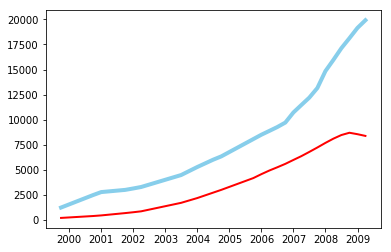

In [144]:
plt.plot( 'Date', 'amazon', data=df.iloc[:25], marker='', markerfacecolor='b', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Date', 'ebay', data=df.iloc[:25], marker='', color='r', linewidth=2)


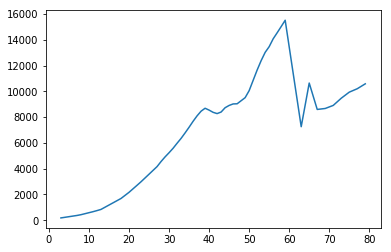

In [145]:
df['ebay'].plot()
pyplot.show()

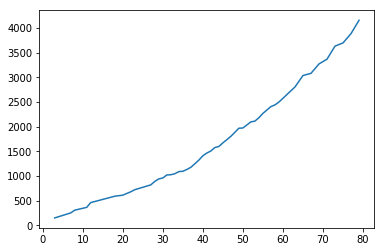

In [146]:
df['Internet_Usage'].plot()


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 3 to 79
Data columns (total 8 columns):
Date              50 non-null datetime64[ns]
Internet_Usage    50 non-null float64
amazon            50 non-null float64
ebay              50 non-null float64
ebay_RD           50 non-null float64
amazon_RD         50 non-null float64
amazon_mark       50 non-null float64
amazon_NI         50 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 3.5 KB


In [148]:
result = adfuller(df['ebay'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.737363
p-value: 0.411972
Critical Values:
	1%: -3.575
	5%: -2.924
	10%: -2.600


In [149]:
result = adfuller(df['ebay_RD'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.022425
p-value: 0.960348
Critical Values:
	1%: -3.610
	5%: -2.939
	10%: -2.608


In [150]:
result = adfuller(df['Internet_Usage'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.974045
p-value: 1.000000
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609


In [151]:
#Ebay R&D, Ebay revenue, and internet usage is non stationary

In [152]:
# no cointegration, so make data stationary
smtools.coint(df['ebay'], df['ebay_RD'],
              trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)

(-1.9228151661766995,
 0.5683920464314101,
 array([-4.13391193, -3.46366765, -3.13213796]))

In [153]:
df['de'] = df['ebay'].diff(periods=1)
df['drd'] = df['ebay_RD'].diff(periods=1)
df['di'] = df['Internet_Usage'].diff(periods=1)

df.dropna(inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [154]:
df.head()

,Date,Internet_Usage,amazon,ebay,ebay_RD,amazon_RD,amazon_mark,amazon_NI,de,drd,di
7,2000-09-30,248.0,2466.0,371.34,15.78,70.00,40.331950,-1189.00,189.64,8.88,101.0
8,2000-12-31,304.0,2762.0,431.42,14.14,69.79,63.112033,-1411.00,60.08,-1.64,56.0
11,2001-09-30,361.0,2980.0,663.43,20.18,53.85,30.238235,-1118.00,232.01,6.04,57.0
12,2001-12-31,458.0,3122.0,748.82,21.72,52.32,55.605882,-567.28,85.39,1.54,97.0
13,2002-03-31,479.0,3269.0,839.84,24.31,55.50,24.416910,-356.30,91.02,2.59,21.0


In [155]:
result = adfuller(df['de'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.853294
p-value: 0.000000
Critical Values:
	1%: -3.575
	5%: -2.924
	10%: -2.600


In [156]:
result = adfuller(df['drd'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.063426
p-value: 0.001112
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


In [157]:
result = adfuller(df['di'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.583792
p-value: 0.997808
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


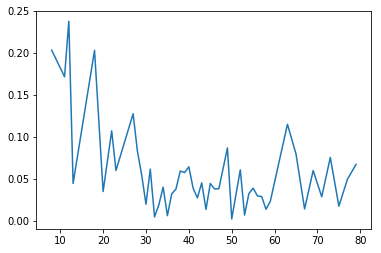

In [158]:
df['i_log'] = np.log(df['Internet_Usage'])
df['i_log_diff'] = df['i_log'].diff(periods=1)
df['i_log_diff'].dropna().plot()

In [159]:
df.dropna(inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [160]:
result = adfuller(df['i_log_diff'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.459209
p-value: 0.000003
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


In [161]:
df['lag_e1'] = df['de'].shift(1)
df['lag_e2'] = df['de'].shift(2)
df['lag_e3'] = df['de'].shift(3)
df['lag_e4'] = df['de'].shift(4)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [162]:
df.dropna(inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## ARDL (4,0)

In [163]:
X1_multi=df.drop(['Date','amazon','ebay','Internet_Usage','ebay_RD','di','de',
                  'i_log','amazon_RD','amazon_mark','amazon_NI'], axis=1)
Y_target=df.de

In [164]:
X1_multi=sm.tools.tools.add_constant(X1_multi, prepend=True, has_constant='skip')

                            OLS Regression Results                            
Dep. Variable:                     de   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     38.68
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.73e-14
Time:                        00:51:41   Log-Likelihood:                -339.05
No. Observations:                  44   AIC:                             692.1
Df Residuals:                      37   BIC:                             704.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9639    159.353     -0.063      0.9

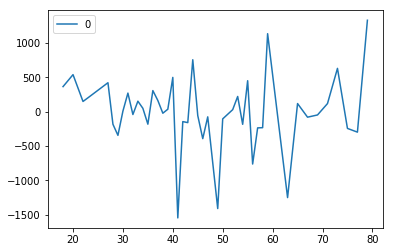

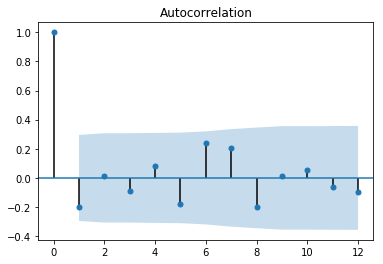

In [165]:
model = sm.OLS(Y_target, X1_multi)
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
plot_acf(residuals,lags=12)
pyplot.show()

In [166]:
# we can see that the internet usage is not a significant variable for influencing Ebay's revenue

In [167]:
#Now it is time to check its affect on Amazon's revenue

## Amazon Data

In [168]:
data=pd.read_excel("Amazon_Ebay_Rev.xlsx")

In [169]:
data=data[data['Internet_Usage']!=0]

In [170]:
data.head()

,Date,Internet_Usage,amazon,ebay,ebay_RD,amazon_RD,amazon_mark,amazon_NI
3,1999-09-30,147,1217.0,181.70,6.90,44.60,39.950920,-443.20
7,2000-09-30,248,2466.0,371.34,15.78,70.00,40.331950,-1189.00
8,2000-12-31,304,2762.0,431.42,14.14,69.79,63.112033,-1411.00
11,2001-09-30,361,2980.0,663.43,20.18,53.85,30.238235,-1118.00
12,2001-12-31,458,3122.0,748.82,21.72,52.32,55.605882,-567.28


In [171]:
#cointegration
smtools.coint(data['amazon_RD'], data['amazon'],
              trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)

(-2.8332553763163486,
 0.1553326293027854,
 array([-4.13391193, -3.46366765, -3.13213796]))

In [172]:
#cointegration
smtools.coint(data['amazon_mark'], data['amazon'],
              trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)

(-1.6083128617665596,
 0.717368469063133,
 array([-4.13391193, -3.46366765, -3.13213796]))

In [173]:
result = adfuller(data['amazon'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.421938
p-value: 0.997212
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609


In [174]:
result = adfuller(data['amazon_RD'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 4.919170
p-value: 1.000000
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606


In [175]:
result = adfuller(data['amazon_mark'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.214492
p-value: 0.998894
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609


In [176]:
result = adfuller(data['amazon_NI'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.644402
p-value: 0.999082
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605


In [177]:
data['da'] = data['amazon'].diff(periods=1)
data['dard'] = data['amazon_RD'].diff(periods=1)
data['dam'] = data['amazon_mark'].diff(periods=1)
data['dani'] = data['amazon_NI'].diff(periods=1)

data.dropna(inplace=True)

In [178]:
result = adfuller(data['da'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.911675
p-value: 1.000000
Critical Values:
	1%: -3.610
	5%: -2.939
	10%: -2.608


In [179]:
result = adfuller(data['dard'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 4.192402
p-value: 1.000000
Critical Values:
	1%: -3.610
	5%: -2.939
	10%: -2.608


In [180]:
result = adfuller(data['dam'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.313397
p-value: 1.000000
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


In [181]:
result = adfuller(data['dani'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.535049
p-value: 0.985900
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605


In [182]:
data['Internet_Usage'] = data['Internet_Usage'].astype(str)
data['Internet_Usage'] = data['Internet_Usage'].apply(lambda x: x.replace(",","").strip())

In [183]:
data['Internet_Usage'] = data['Internet_Usage'].astype(float)

In [184]:
data['da1'] = np.log(data['amazon'])
data['da'] = data['da1'].diff(periods=1)

data['dard1'] = np.log(data['amazon_RD'])
data['dard'] = data['dard1'].diff(periods=1)

data['dam1'] = np.log(data['amazon_mark'])
data['dam'] = data['dam1'].diff(periods=1)

data['dani'] = np.log(data['amazon_NI'])
data['dani'] = data['dani'].diff(periods=1)

data['i_log_diff'] = np.log(data['Internet_Usage'])
data['i_log_diff'] = data['i_log_diff'].diff(periods=1)

data.dropna(inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [185]:
#cointegration
smtools.coint(data['dard1'], data['da1'],
              trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)

(-3.0244459903319005,
 0.10450842721806408,
 array([-4.2475573 , -3.52174107, -3.17154412]))

In [186]:
#cointegration
smtools.coint(data['dam1'], data['da1'],
              trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)

(-2.3107956898240465,
 0.36817837805894993,
 array([-4.2475573 , -3.52174107, -3.17154412]))

In [187]:
data = data.drop(["da1",'dard1','dam1'], axis=1)
data.head()

,Date,Internet_Usage,amazon,ebay,ebay_RD,amazon_RD,amazon_mark,amazon_NI,da,dard,dam,dani,i_log_diff
22,2004-06-30,677.0,5998.0,2709.0,59.98,71.0,35.640000,275.85,0.130535,0.315097,-0.227575,2.056541,0.107496
23,2004-09-30,719.0,6326.0,2984.0,63.40,81.5,36.298755,314.29,0.053242,0.137923,0.018315,0.130459,0.060190
27,2005-09-30,817.0,8054.0,4159.0,78.88,126.0,43.385294,506.00,0.241501,0.435679,0.178337,0.476221,0.127778
28,2005-12-31,888.0,8490.0,4552.0,103.88,156.5,79.782353,359.00,0.052720,0.216774,0.609182,-0.343214,0.083333
29,2006-03-31,938.0,8867.0,4911.0,119.07,146.0,51.373178,332.00,0.043448,-0.069449,-0.440186,-0.078187,0.054778


In [188]:
result = adfuller(data['da'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.181286
p-value: 0.000010
Critical Values:
	1%: -3.639
	5%: -2.951
	10%: -2.614


In [189]:
result = adfuller(data['dard'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.702695
p-value: 0.000083
Critical Values:
	1%: -3.639
	5%: -2.951
	10%: -2.614


In [190]:
result = adfuller(data['dam'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.353763
p-value: 0.000000
Critical Values:
	1%: -3.654
	5%: -2.957
	10%: -2.618


In [191]:
result = adfuller(data['dani'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.814640
p-value: 0.000000
Critical Values:
	1%: -3.639
	5%: -2.951
	10%: -2.614


In [192]:
result = adfuller(data['i_log_diff'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.017068
p-value: 0.000021
Critical Values:
	1%: -3.670
	5%: -2.964
	10%: -2.621


In [193]:
# now the data is stationary so we can do an OLS

In [194]:
data['lag_a1'] = data['da'].shift(1)
data['lag_a2'] = data['da'].shift(2)

data.dropna(inplace=True)

In [195]:
data.head()

,Date,Internet_Usage,amazon,ebay,ebay_RD,amazon_RD,amazon_mark,amazon_NI,da,dard,dam,dani,i_log_diff,lag_a1,lag_a2
27,2005-09-30,817.0,8054.0,4159.0,78.88,126.0,43.385294,506.0,0.241501,0.435679,0.178337,0.476221,0.127778,0.053242,0.130535
28,2005-12-31,888.0,8490.0,4552.0,103.88,156.5,79.782353,359.0,0.052720,0.216774,0.609182,-0.343214,0.083333,0.241501,0.053242
29,2006-03-31,938.0,8867.0,4911.0,119.07,146.0,51.373178,332.0,0.043448,-0.069449,-0.440186,-0.078187,0.054778,0.052720,0.241501
30,2006-06-30,957.0,9253.0,5236.0,123.97,167.0,53.929057,302.0,0.042611,0.134387,0.048553,-0.094708,0.020053,0.043448,0.052720
31,2006-09-30,1018.0,9702.0,5579.0,120.40,172.0,61.596696,291.0,0.047384,0.029501,0.132939,-0.037104,0.061792,0.042611,0.043448


In [196]:
X1_multi=data.drop(['Date','amazon','ebay','Internet_Usage','ebay_RD','amazon_RD','amazon_mark', 'amazon_NI','da',
                  'amazon_RD','amazon_mark','amazon_NI','dani'], axis=1)
Y_target=data.da

In [197]:
X1_multi=sm.tools.tools.add_constant(X1_multi, prepend=True, has_constant='skip')

                            OLS Regression Results                            
Dep. Variable:                     da   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     5.831
Date:                Wed, 08 May 2019   Prob (F-statistic):           0.000891
Time:                        00:51:42   Log-Likelihood:                 65.018
No. Observations:                  33   AIC:                            -118.0
Df Residuals:                      27   BIC:                            -109.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0397      0.020      2.019      0.0

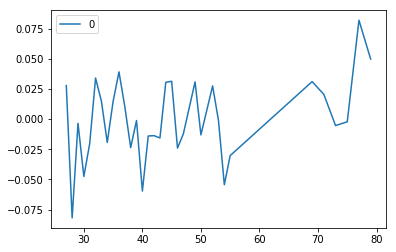

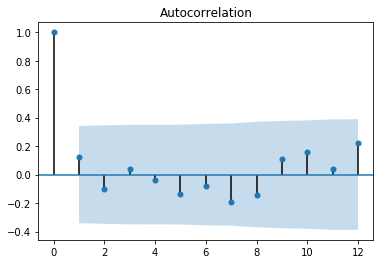

In [198]:
model = sm.OLS(Y_target, X1_multi)
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
plot_acf(residuals,lags=12)
pyplot.show()

In [199]:
X1_multi=data.drop(['Date','amazon','ebay','Internet_Usage','ebay_RD','amazon_RD','amazon_mark', 'amazon_NI','da',
                  'amazon_RD','amazon_mark','amazon_NI','lag_a2', 'dani','dard'], axis=1)
Y_target=data.da

In [200]:
X1_multi=sm.tools.tools.add_constant(X1_multi, prepend=True, has_constant='skip')

                            OLS Regression Results                            
Dep. Variable:                     da   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     4.315
Date:                Wed, 08 May 2019   Prob (F-statistic):             0.0124
Time:                        00:51:43   Log-Likelihood:                 59.025
No. Observations:                  33   AIC:                            -110.1
Df Residuals:                      29   BIC:                            -104.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0452      0.020      2.281      0.0

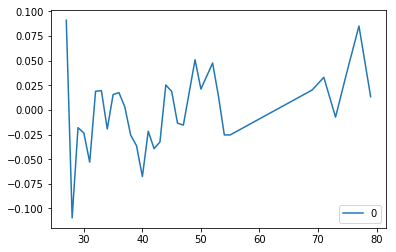

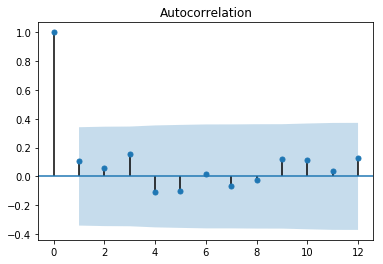

In [201]:
model = sm.OLS(Y_target, X1_multi)
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
plot_acf(residuals,lags=12)
pyplot.show()

In [202]:
# we can see that the internet is significant in amazon case, so we can do difference in difference

### Significance Tests

In [203]:
dif_test=pd.read_excel("t_test.xlsx")

In [204]:
dif_test.head()

,amazon,ebay
0,609.80,78.10
1,816.04,114.90
2,1014.00,144.90
3,1217.00,181.70
4,1640.00,224.72


In [205]:
stats.ttest_ind(dif_test["amazon"].iloc[0:37], dif_test["amazon"].iloc[37:])

Ttest_indResult(statistic=-9.799845116198561, pvalue=1.2397518726400342e-14)

In [206]:
# p_value is lower than 0.05 we reject the Null hypothesis and conclude the difference is significant

In [207]:
mean_T2017=dif_test["amazon"].iloc[0:37].mean()
mean_A2017=dif_test["amazon"].iloc[37:].mean()
TA_dif_A=mean_A2017-mean_T2017
print("Amazon: Before Iphone launch", mean_T2017)
print("Amazon: After Iphone launch", mean_A2017)
print("Amazon: Iphone launch effect", TA_dif_A)

Amazon: Before Iphone launch 5569.752432432432
Amazon: After Iphone launch 54202.72727272727
Amazon: Iphone launch effect 48632.97484029484


In [208]:
stats.ttest_ind(dif_test["ebay"].iloc[0:37], dif_test["ebay"].iloc[37:])

Ttest_indResult(statistic=-13.58856016704948, pvalue=4.6733140863995364e-21)

In [209]:
# p_value is lower than 0.05 we reject the Null hypothesis and conclude the difference is significant

In [210]:
mean_T2017=dif_test["ebay"].iloc[0:37].mean()
mean_A2017=dif_test["ebay"].iloc[37:].mean()
TA_dif_E=mean_A2017-mean_T2017
print("Ebay: Before Iphone launch", mean_T2017)
print("Ebay: After Iphone launch", mean_A2017)
print("Ebay: Iphone launch effect", TA_dif_E)

Ebay: Before Iphone launch 2515.63972972973
Ebay: After Iphone launch 10148.060606060606
Ebay: Iphone launch effect 7632.420876330876


In [211]:
t_effect=(TA_dif_A-TA_dif_E)
print("Total Iphone Effect", t_effect)

Total Iphone Effect 41000.55396396396


In [212]:
# Apple effect till March, 2016 is equal to 41,000 billion

## Regression Discontinuity

In [213]:
df1=pd.read_excel('Amazon_data_rev.xlsx')

In [214]:
df1.head()

,Date,Code,R_D,Mark_Exp,NI,Rev,iphone
0,1998-03-31,1,7.3,13.087464,-36.4,219.30,0
1,1998-06-30,2,8.1,13.738581,-50.9,307.40,0
2,1998-09-30,3,13.4,15.691934,-87.6,423.10,0
3,1998-12-31,4,16.9,24.482021,-123.2,609.80,0
4,1999-03-31,5,23.5,35.307975,-174.5,816.04,0


In [215]:
df1 = df1.drop(columns=["Date","NI"])

In [216]:
# make stationary

In [217]:
df1['d_r_D'] = df1['R_D'].diff(periods=1)
df1['d_m_e'] = df1['Mark_Exp'].diff(periods=1)
df1['d_rev'] = df1['Rev'].diff(periods=1)

df1.dropna(inplace=True)

In [218]:
result = adfuller(df1['d_r_D'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.562205
p-value: 0.999067
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589


In [219]:
result = adfuller(df1['d_m_e'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 5.055421
p-value: 1.000000
Critical Values:
	1%: -3.523
	5%: -2.902
	10%: -2.588


In [220]:
result = adfuller(df1['d_rev'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.382765
p-value: 0.997034
Critical Values:
	1%: -3.521
	5%: -2.901
	10%: -2.588


In [221]:
df1['d_r_D'] = np.log(df1['R_D'])
df1['d_r_D'] = df1['d_r_D'].diff(periods=1)
                               
df1['d_m_e'] = np.log(df1['Mark_Exp'])
df1['d_m_e'] = df1['d_m_e'].diff(periods=1)

df1['d_rev_log'] = np.log(df1['Rev'])
df1['d_rev'] = df1['d_rev_log'].diff(periods=1)

In [222]:
df1.head()

,Code,R_D,Mark_Exp,Rev,iphone,d_r_D,d_m_e,d_rev,d_rev_log
1,2,8.1,13.738581,307.40,0,NaN,NaN,NaN,5.728150
2,3,13.4,15.691934,423.10,0,0.503391,0.132939,0.319459,6.047609
3,4,16.9,24.482021,609.80,0,0.232059,0.444792,0.365522,6.413131
4,5,23.5,35.307975,816.04,0,0.329687,0.366170,0.291332,6.704463
5,6,34.3,36.819632,1014.00,0,0.378145,0.041922,0.217195,6.921658


In [223]:
df1.dropna(inplace=True)

In [224]:
result = adfuller(df1['d_r_D'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.548365
p-value: 0.000161
Critical Values:
	1%: -3.516
	5%: -2.899
	10%: -2.587


In [225]:
result = adfuller(df1['d_m_e'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.346152
p-value: 0.157514
Critical Values:
	1%: -3.522
	5%: -2.901
	10%: -2.588


In [226]:
result = adfuller(df1['d_rev'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.418596
p-value: 0.000275
Critical Values:
	1%: -3.525
	5%: -2.903
	10%: -2.589


In [227]:
# so as the data is stationary we can do a simple OLS

In [228]:
df1.head()

,Code,R_D,Mark_Exp,Rev,iphone,d_r_D,d_m_e,d_rev,d_rev_log
2,3,13.4,15.691934,423.10,0,0.503391,0.132939,0.319459,6.047609
3,4,16.9,24.482021,609.80,0,0.232059,0.444792,0.365522,6.413131
4,5,23.5,35.307975,816.04,0,0.329687,0.366170,0.291332,6.704463
5,6,34.3,36.819632,1014.00,0,0.378145,0.041922,0.217195,6.921658
6,7,44.6,39.950920,1217.00,0,0.262589,0.081621,0.182486,7.104144


In [229]:
Y=df1.d_rev
X=df1.drop(columns=['Code','R_D','Mark_Exp','Rev','d_rev','d_rev_log','d_m_e'])

In [230]:
X.head()

,iphone,d_r_D
2,0,0.503391
3,0,0.232059
4,0,0.329687
5,0,0.378145
6,0,0.262589


In [231]:
model = sm.OLS(Y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  d_rev   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     79.80
Date:                Wed, 08 May 2019   Prob (F-statistic):           7.10e-20
Time:                        00:51:44   Log-Likelihood:                 116.75
No. Observations:                  83   AIC:                            -229.5
Df Residuals:                      81   BIC:                            -224.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
iphone         0.0179      0.010      1.840      0.069      -0.001       0.037
d_r_D          0.5835      0.057     10.286      0.000       0.471       0.696
==============================================================================
Omnibus:                       15.331   Durbin-Watson:                   1.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.277
Skew:                           0.914   Prob(JB):                     0.000107
Kurtosis:                       4.394   Cond. No.                         6.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
# the Iphone launch date's code
df1[df1["Code"]==38]

,Code,R_D,Mark_Exp,Rev,iphone,d_r_D,d_m_e,d_rev,d_rev_log
37,38,201.0,71.965644,12190.0,1,0.077558,0.041922,0.062626,9.408371


In [233]:
df1['csize'] = df1['Code'].map(lambda x: x-38)

Text(0.5, 1.0, 'Regression Discontinuity')

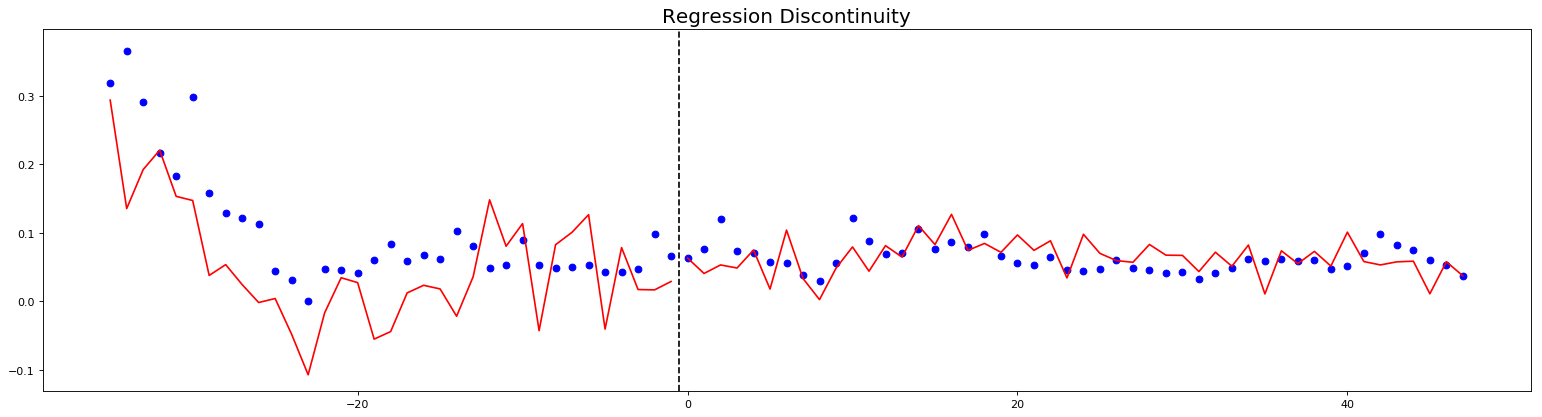

In [234]:
plt.figure(num=None, figsize=(24, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df1.csize, df1.d_rev, color="blue")
l=df1[df1.csize<0].csize.count()
plt.plot(df1.csize[0:l], result.predict()[0:l], '-', color="r")
plt.plot(df1.csize[l:], result.predict()[l:], '-', color="r")
plt.axvline(x=-0.5,color="black", linestyle="--")
plt.title("Regression Discontinuity", fontsize="18")

## ARDL

In [235]:
df1.index=np.arange(0, df1.shape[0])


In [236]:
len(df1)

83

In [237]:
df1

,Code,R_D,Mark_Exp,Rev,iphone,d_r_D,d_m_e,d_rev,d_rev_log,csize
0,3,13.40,15.691934,423.10,0,0.503391,0.132939,0.319459,6.047609,-35
1,4,16.90,24.482021,609.80,0,0.232059,0.444792,0.365522,6.413131,-34
2,5,23.50,35.307975,816.04,0,0.329687,0.366170,0.291332,6.704463,-33
3,6,34.30,36.819632,1014.00,0,0.378145,0.041922,0.217195,6.921658,-32
4,7,44.60,39.950920,1217.00,0,0.262589,0.081621,0.182486,7.104144,-31
5,8,57.40,64.029448,1640.00,0,0.252310,0.471691,0.298307,7.402452,-30
6,9,61.24,37.800000,1920.00,0,0.064756,-0.527034,0.157629,7.560080,-29
7,10,67.13,39.600000,2184.00,0,0.091830,0.046520,0.128833,7.688913,-28
8,11,70.00,40.331950,2466.00,0,0.041864,0.018315,0.121439,7.810353,-27
9,12,69.79,63.112033,2762.00,0,-0.003005,0.447767,0.113358,7.923710,-26


In [238]:
df2=df1.iloc[75:]

In [239]:
df1=df1.iloc[0:75]

In [240]:
df1['lag_a1'] = df1['d_rev'].shift(1)
df1['lag_a2'] = df1['d_rev'].shift(2)
df1['lag_a3'] = df1['d_rev'].shift(3)
df1['lag_a4'] = df1['d_rev'].shift(4)

#df1['lag_d_r_D1'] = df1['d_r_D'].shift(1)


df1.dropna(inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [241]:
X1_multi=df1.loc[:,['lag_a1','d_r_D','iphone','lag_a2','lag_a3']]
Y_target=df1.d_rev

In [242]:
X1_multi=sm.tools.tools.add_constant(X1_multi, prepend=True, has_constant='skip')

                            OLS Regression Results                            
Dep. Variable:                  d_rev   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     21.26
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.56e-12
Time:                        00:51:45   Log-Likelihood:                 161.29
No. Observations:                  71   AIC:                            -310.6
Df Residuals:                      65   BIC:                            -297.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.008      2.412      0.0

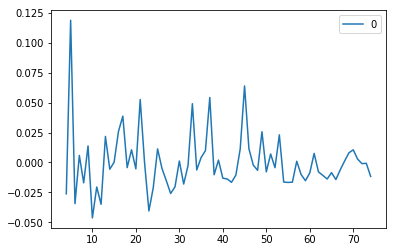

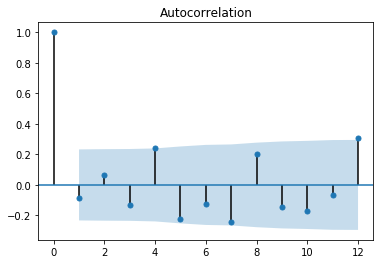

In [243]:
model = sm.OLS(Y_target, X1_multi)
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
plot_acf(residuals,lags=12)
pyplot.show()

## Test the Model

In [244]:
df2['lag_a1'] = df2['d_rev'].shift(1)
df2['lag_a2'] = df2['d_rev'].shift(2)
df2['lag_a3'] = df2['d_rev'].shift(3)

df2.dropna(inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [245]:
X2_multi=df2.loc[:,['lag_a1','lag_a2','lag_a3','d_r_D','iphone']]


In [246]:
X2_multi=X2_multi[sorted(X2_multi.columns)]

In [247]:
X2_multi

,d_r_D,iphone,lag_a1,lag_a2,lag_a3
78,0.068106,1,0.098717,0.070901,0.051602
79,0.069713,1,0.082621,0.098717,0.070901
80,-0.011798,1,0.074441,0.082621,0.098717
81,0.068397,1,0.059867,0.074441,0.082621
82,0.033088,1,0.052585,0.059867,0.074441


In [248]:
param=pd.DataFrame(model_fit.params, columns = ['values'])

In [249]:
param['coefficients']=param.index
param.index=np.arange(0, param.shape[0])
param

,values,coefficients
0,0.018784,const
1,0.417994,lag_a1
2,0.108425,d_r_D
3,-0.002919,iphone
4,-0.045278,lag_a2
5,0.229379,lag_a3


In [250]:
param=param.iloc[1:]

In [251]:
coef_list=param.loc[:,'values']

In [252]:
Y_pred_test=np.dot(X2_multi, coef_list)

In [253]:
Y_pred_test

array([0.14523072, 0.1491167 , 0.12217883, 0.15242082, 0.13646674])

In [254]:
for i in range(0, len(Y_pred_test)):
    Y_pred_test[i]=Y_pred_test[i]+0.018784

In [255]:
Y_pred_test

array([0.16401472, 0.1679007 , 0.14096283, 0.17120482, 0.15525074])

In [256]:
Y_pred_log=[11.867588]
for i in range(0, len(Y_pred_test)):
    Y_pred_log.append(Y_pred_log[i]+Y_pred_test[i])

In [257]:
Y_pred_log=Y_pred_log[1:]

In [258]:
Y_pred_log_final=np.exp(Y_pred_log)

In [259]:
len(Y_pred_log_final)

5

In [260]:
true_values=pd.read_excel('Amazon_data_rev.xlsx')

In [261]:
true_values.tail()

,Date,Code,R_D,Mark_Exp,NI,Rev,iphone
80,2018-03-31,81,6759.0,2699.0,3939.0,193190.0,1
81,2018-06-30,82,7247.0,2901.0,6276.0,208120.0,1
82,2018-09-30,83,7162.0,3303.0,8903.0,220960.0,1
83,2018-12-31,84,7669.0,4912.0,10070.0,232890.0,1
84,2019-03-31,85,7927.0,3664.0,12000.0,241540.0,1


In [262]:
true_values=true_values.iloc[80:]

In [263]:
true_values=np.array(true_values.loc[:,'Rev'])

In [264]:
true_values

array([193190., 208120., 220960., 232890., 241540.])

In [265]:
Y_pred_log_final

array([167980.42215766, 198690.45947441, 228768.58984226, 271487.41507586,
       317083.93810671])

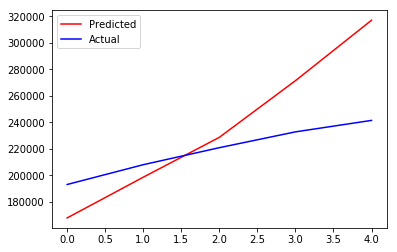

In [266]:
plt.plot(Y_pred_log_final, color='r', label='Predicted')
plt.plot(true_values, color='b', label='Actual')
plt.legend()
plt.show()

In [267]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [268]:
mse=mean_squared_error(true_values, Y_pred_log_final)
print("MSE:", mse)

MSE: 1596412032.0094237


In [269]:
mape=mean_absolute_error(true_values, Y_pred_log_final)
print("MAPE:", mape)

MAPE: 31317.81227855557
